In [129]:
#Loading in Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c anaconda graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [6]:
import graphviz

In [36]:
from sklearn import metrics

In [7]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.tree import export_graphviz
import pydotplus

In [9]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [10]:
from IPython.display import Image 

In [11]:
from six import StringIO

In [12]:
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [13]:
data.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

In [14]:
#Find null values for each column
data.isnull().sum()
#we do not need to drop any data

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [15]:
#Describe summary startistics
data.describe(include = 'all')

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin education_bin workclass_bin   age_bin   flag  \
count              48842         48842         48842     48842  48842   
unique                 5             5             2         5      2   
top              b. 9-12        b. Mid     b. income  e. 40-55  train   
freq               30324         30324         46012     13963  32561   
mean                 NaN           NaN           NaN       NaN    NaN   
std                  NaN           NaN           NaN       NaN    NaN   
min                  NaN           NaN           NaN       NaN    NaN   
25%                  NaN           NaN           NaN       NaN    NaN   
50%                  NaN           NaN           NaN       NaN    NaN   
75%                  NaN           NaN           NaN       NaN    NaN   
max                  NaN           NaN           NaN       NaN    NaN   

                   y  
count   48842.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.239282  
std         0.426649  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [16]:
#Exploratory Data Analysis using Stacked Bar Charts

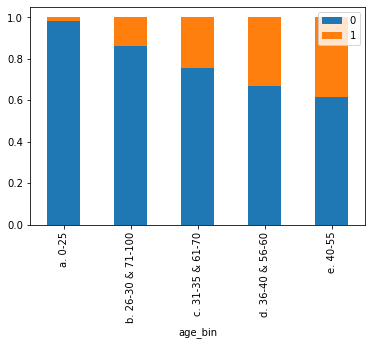

In [17]:
df2 = pd.crosstab(index = data["age_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

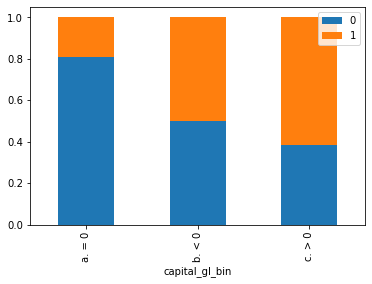

In [18]:
df2 = pd.crosstab(index = data["capital_gl_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

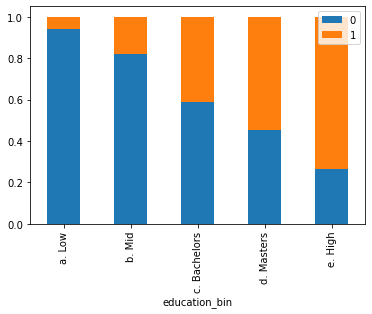

In [19]:
df2 = pd.crosstab(index = data["education_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

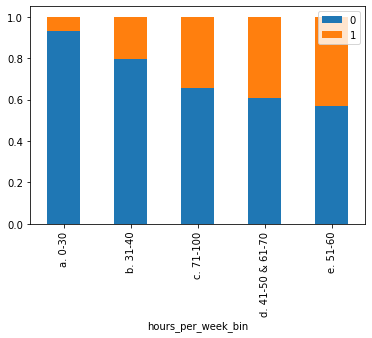

In [20]:
df2 = pd.crosstab(index = data["hours_per_week_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

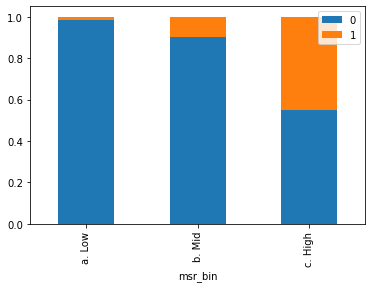

In [21]:
df2 = pd.crosstab(index = data["msr_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

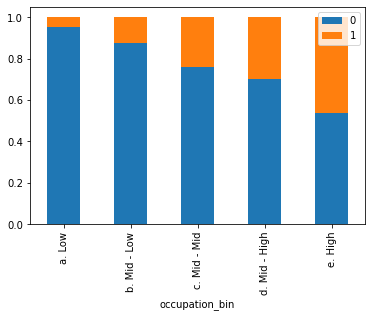

In [22]:
df2 = pd.crosstab(index = data["occupation_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

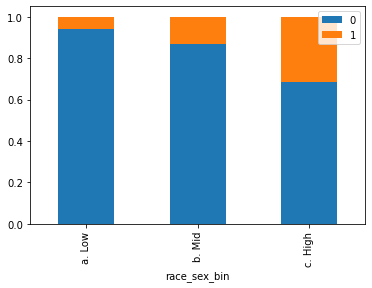

In [23]:
df2 = pd.crosstab(index = data["race_sex_bin"], columns = data["y"], normalize= "index")
df2.plot.bar(stacked = True)
plt.legend(loc = "upper right")

In [24]:
#PART 2 BUILD DECISION TREE CLASSIFIER MODEL

In [25]:
#Segmenting data into training and testing data as well as isolating independent variables from response variable
Train_Data = data[data.flag == "train"]
Y_Train = Train_Data["y"]
Test_Data = data[data.flag == "test"]
Y_Test = Test_Data["y"]
Train_Data_X = Train_Data.drop(columns = ["flag","y"])
Train_Data_X
Test_Data_X = Test_Data.drop(columns = ["flag","y"])
Test_Data_X

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
32561           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
32562   d. 41-50 & 61-70   b. Mid - Low  c. High         a. = 0      c. High   
32563           b. 31-40  d. Mid - High  c. High         a. = 0      c. High   
32564           b. 31-40   b. Mid - Low  c. High         c. > 0       b. Mid   
32565            a. 0-30   b. Mid - Low   a. Low         a. = 0       b. Mid   
...                  ...            ...      ...            ...          ...   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      education_num_bin education_bin workclass_bin            age_bin  
32561            a. 0-8        a. Low     b. income            a. 0-25  
32562           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  
32563           b. 9-12        b. Mid     b. income  b. 26-30 & 71-100  
32564           b. 9-12        b. Mid     b. income           e. 40-55  
32565           b. 9-12        b. Mid  a. no income            a. 0-25  
...                 ...           ...           ...                ...  
48837             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  
48838           b. 9-12        b. Mid  a. no income   c. 31-35 & 61-70  
48839             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  
48840             c. 13  c. Bachelors     b. income           e. 40-55  
48841             c. 13  c. Bachelors     b. income   c. 31-35 & 61-70  

[16281 rows x 9 columns]

In [158]:
#convert categorical variables into numeric encodings using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Train_Coded = enc.fit_transform(Train_Data_X)
Train_Coded
Test_Coded = enc.transform(Test_Data_X)
Test_Coded

<bound method csr_matrix.getcol of <16281x36 sparse matrix of type '<class 'numpy.float64'>'
	with 146529 stored elements in Compressed Sparse Row format>>

In [27]:
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=4, max_features=None, min_samples_leaf=15)

In [28]:
#Fit Tree to training data and predict
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

In [34]:
dot_data = tree.export_graphviz(dtree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Tree")

'Tree.pdf'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.973268 to fit



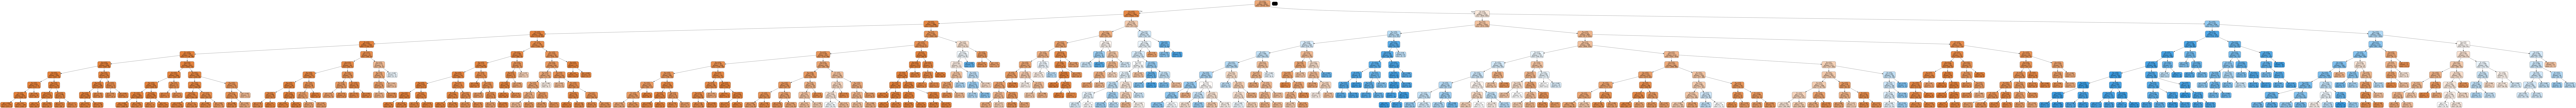

In [29]:
#Visualizing Decision Tree
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
# (5) Calculating accuracy scores
#Confusion matrix
metrics.confusion_matrix(Y_Test, y_pred)

array([[11538,   897],
       [ 1656,  2190]])

Accuracy: 0.8431914501566243 
 Precision: 0.7094266277939747 
 Recall: 0.5694227769110765 
 F1: 0.6317611423626136 
 Area under curve: 0.8888826996586094


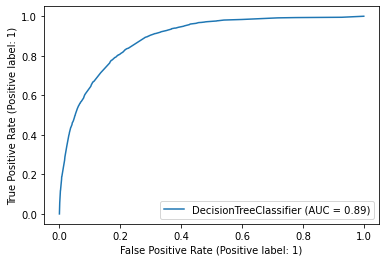

In [53]:
# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
auc = metrics.roc_auc_score(Y_Test, dtree.predict_proba(Test_Coded)[:,1])
metrics.plot_roc_curve(dtree, Test_Coded, Y_Test)
print("Accuracy:", acc, "\n", "Precision:", prec, "\n", "Recall:", rec, "\n", "F1:", f1, "\n", "Area under curve:", auc)

In [56]:
# PART 3
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "entropy" ,max_depth=10, random_state=4, max_features=None,
                               min_samples_leaf=15, min_samples_split= 20)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8438056630428107 
 Recall: 0.5702028081123245 
 Precision: 0.7113201427181317 
 F1: 0.6329917737047193


In [57]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "entropy" ,max_depth=12, random_state=4, max_features=None,
                               min_samples_leaf=25, min_samples_split= 30)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8422087095387262 
 Recall: 0.5590223608944358 
 Precision: 0.7112140258021833 
 F1: 0.6260008734895909


In [67]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "entropy" ,max_depth=20, random_state=4, max_features=None,
                               min_samples_leaf=20, min_samples_split= 20)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8434371353110989 
 Recall: 0.5663026521060842 
 Precision: 0.7119973847662635 
 F1: 0.6308472121650978


In [75]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "entropy" ,max_depth=15, random_state=4, max_features=None,
                               min_samples_leaf=30, min_samples_split= 50)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8419630243842516 
 Recall: 0.5582423296931878 
 Precision: 0.710691823899371 
 F1: 0.6253094509975243


In [76]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "gini" ,max_depth=10, random_state=4, max_features=None,
                               min_samples_leaf=15, min_samples_split= 20)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8431914501566243 
 Recall: 0.5694227769110765 
 Precision: 0.7094266277939747 
 F1: 0.6317611423626136


In [77]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "gini" ,max_depth=6, random_state=4, max_features=None,
                               min_samples_leaf=12, min_samples_split= 30)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8400589644370738 
 Recall: 0.5837233489339574 
 Precision: 0.6911945812807881 
 F1: 0.6329292359740626


In [82]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtree = DecisionTreeClassifier(criterion= "gini" ,max_depth=12, random_state=4, max_features=None,
                               min_samples_leaf=4, min_samples_split= 10)
dtree.fit(Train_Coded, Y_Train)
y_pred = dtree.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8406731773232602 
 Recall: 0.5717628705148206 
 Precision: 0.6989828353464718 
 F1: 0.6290045766590389


In [88]:
#(6) Tuning Decision Tree 4 ENTROPY Trees First
#Initiate the Tree Classifier
dtreeBest = DecisionTreeClassifier(criterion= "gini" ,max_depth=9, random_state=4, max_features=None,
                               min_samples_leaf=16, min_samples_split= 15)
dtreeBest.fit(Train_Coded, Y_Train)
y_pred = dtreeBest.predict(Test_Coded)

# (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
acc = metrics.accuracy_score(Y_Test, y_pred)
prec = metrics.precision_score(Y_Test, y_pred)
rec = metrics.recall_score(Y_Test, y_pred)
f1 = metrics.f1_score(Y_Test, y_pred)
print("Accuracy:", acc, "\n","Recall:", rec, "\n", "Precision:", prec, "\n",  "F1:", f1)

Accuracy: 0.8442356120631411 
 Recall: 0.5790431617264691 
 Precision: 0.7083333333333334 
 F1: 0.6371959942775393


In [109]:
#drawing best tree into pdf

dot_data = tree.export_graphviz(dtreeBest, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("BestTree")

'BestTree.pdf'

In [105]:
#PART 4
#Automation of Tree Tuning, this function passes in lists of four different tree hyper parameters then
#creates a tree and runs performance statistic for each individual tree
#a dataframe is created and returned containing the results of each tree test

def Auto_Prune(criterions, MaxDepths, MinSamLeafs, MinSamSplits):
    Cs = []
    MXD = []
    MSL = []
    MSS = []
    ACCs = []
    PRCs = []
    RECs = []
    F1s = []

    for n in range(len(criterions)):
        dtree = DecisionTreeClassifier(criterion= criterions[n] ,max_depth=MaxDepths[n], random_state=4, max_features=None,
                               min_samples_leaf=MinSamLeafs[n], min_samples_split= MinSamSplits[n])
        dtree.fit(Train_Coded, Y_Train)
        y_pred = dtree.predict(Test_Coded)

        # (5) Evaluate accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph) 
        acc = metrics.accuracy_score(Y_Test, y_pred)
        prec = metrics.precision_score(Y_Test, y_pred)
        rec = metrics.recall_score(Y_Test, y_pred)
        f1 = metrics.f1_score(Y_Test, y_pred)
        Cs.append(criterions[n])
        MXD.append(MaxDepths[n])
        MSL.append(MinSamLeafs[n])
        MSS.append(MinSamSplits[n])
        ACCs.append(acc)
        PRCs.append(prec)
        RECs.append(rec)
        F1s.append(f1)
        
    dic = {"Split Criteria":Cs, "Min Sample Split": MSS, "Min Sample Leaf": MSL, "Max Depth":MXD,
          "Accuracy": ACCs,"Recall":RECs , "Precision":PRCs, "F1 Score":F1s}
    Result = pd.DataFrame(data = dic)
    return(Result)
        
        

In [108]:
#Set different tree configuration combinations into a list then pass into function
#we can convert the resulting dataframe of tree performance results into a csv file
criterions = ['entropy','entropy','entropy','entropy','gini','gini','gini','gini']
MaxDepths = [10,12,20,15,10,6,12,9]
MinSamLeafs = [15,25,20,30,15,12,4,16]
MinSamSplits = [20,30,20,50,20,30,10,15]
Resultdf = Auto_Prune(criterions, MaxDepths, MinSamLeafs, MinSamSplits)
Resultdf.to_csv('Results')

In [140]:
#PART 5 Predicting Given Variables:
#Decipher encoded variables
FtNames = enc.get_feature_names(Train_Data_X.columns)
FtNames.tolist()

['hours_per_week_bin_a. 0-30',
 'hours_per_week_bin_b. 31-40',
 'hours_per_week_bin_c. 71-100',
 'hours_per_week_bin_d. 41-50 & 61-70',
 'hours_per_week_bin_e. 51-60',
 'occupation_bin_a. Low',
 'occupation_bin_b. Mid - Low',
 'occupation_bin_c. Mid - Mid',
 'occupation_bin_d. Mid - High',
 'occupation_bin_e. High',
 'msr_bin_a. Low',
 'msr_bin_b. Mid',
 'msr_bin_c. High',
 'capital_gl_bin_a. = 0',
 'capital_gl_bin_b. < 0',
 'capital_gl_bin_c. > 0',
 'race_sex_bin_a. Low',
 'race_sex_bin_b. Mid',
 'race_sex_bin_c. High',
 'education_num_bin_a. 0-8',
 'education_num_bin_b. 9-12',
 'education_num_bin_c. 13',
 'education_num_bin_d. 14',
 'education_num_bin_e. 15+',
 'education_bin_a. Low',
 'education_bin_b. Mid',
 'education_bin_c. Bachelors',
 'education_bin_d. Masters',
 'education_bin_e. High',
 'workclass_bin_a. no income',
 'workclass_bin_b. income',
 'age_bin_a. 0-25',
 'age_bin_b. 26-30 & 71-100',
 'age_bin_c. 31-35 & 61-70',
 'age_bin_d. 36-40 & 56-60',
 'age_bin_e. 40-55']

In [172]:
#Create New Testing encoding of features for new individual, then predict using best tree

NewTestDic = {'hours_per_week_bin':'d. 41-50 & 61-70', 'occupation_bin':'b. Mid - Low' , 'msr_bin':'c. High',
              'capital_gl_bin':'c. > 0','race_sex_bin':'b. Mid',
              'education_num_bin':'b. 9-12', 'education_bin':'e. High',
              'workclass_bin':'b. income','age_bin':'d. 36-40 & 56-60'}
NewTestdf = pd.DataFrame(data=NewTestDic, index=[0])
NewTestCode = enc.transform(NewTestdf)

dtreeBest.predict_proba(NewTestCode)


array([[0.30043541, 0.69956459]])